In [1]:
print('---Task 1: Retrieving and Preparing the Data---')

---Task 1: Retrieving and Preparing the Data---


In [2]:
mice_p = 'Data_Cortex_Nuclear.xls'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

In [4]:
mice = pd.read_excel(mice_p)

In [5]:
print('---Task 1: Retrieving and Preparing the Data: Data Types---')

---Task 1: Retrieving and Preparing the Data: Data Types---


In [6]:
mice.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [7]:
mice.MouseID.value_counts()

3418_13    1
3414_12    1
3605_8     1
3415_6     1
3429_1     1
          ..
3513_14    1
3503_7     1
3513_3     1
3498_3     1
3415_1     1
Name: MouseID, Length: 1080, dtype: int64

In [8]:
mice.MouseID.astype(str)

0          309_1
1          309_2
2          309_3
3          309_4
4          309_5
          ...   
1075    J3295_11
1076    J3295_12
1077    J3295_13
1078    J3295_14
1079    J3295_15
Name: MouseID, Length: 1080, dtype: object

In [9]:
mice.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [10]:
mice.Genotype.astype(str)

0       Control
1       Control
2       Control
3       Control
4       Control
         ...   
1075     Ts65Dn
1076     Ts65Dn
1077     Ts65Dn
1078     Ts65Dn
1079     Ts65Dn
Name: Genotype, Length: 1080, dtype: object

In [11]:
mice.Treatment.value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [12]:
mice.Treatment.astype(str)

0       Memantine
1       Memantine
2       Memantine
3       Memantine
4       Memantine
          ...    
1075       Saline
1076       Saline
1077       Saline
1078       Saline
1079       Saline
Name: Treatment, Length: 1080, dtype: object

In [13]:
mice.Behavior.value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [14]:
mice.Behavior.astype(str)

0       C/S
1       C/S
2       C/S
3       C/S
4       C/S
       ... 
1075    S/C
1076    S/C
1077    S/C
1078    S/C
1079    S/C
Name: Behavior, Length: 1080, dtype: object

In [15]:
mice['class'].value_counts()

c-SC-m    150
c-CS-m    150
t-SC-m    135
t-CS-m    135
t-SC-s    135
c-SC-s    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64

In [16]:
mice['class'].astype(str)

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [17]:
print('---Task 1: Retrieving and Preparing the Data: Typos AND Extra-whitespaces---')

---Task 1: Retrieving and Preparing the Data: Typos AND Extra-whitespaces---


In [18]:
mice.MouseID.str.strip()
mice.Genotype.str.strip()
mice.Treatment.str.strip()
mice.Behavior.str.strip()
mice['class'].str.strip()

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [19]:
mice.Genotype = mice.Genotype.replace('Ts65Dn', 'Trisomy', inplace = True)

In [20]:
print('---Task 1: Retrieving and Preparing the Data: NaN Values---')

---Task 1: Retrieving and Preparing the Data: NaN Values---


In [21]:
mice.fillna(0, inplace = True)
#All String fields were verified with no NaN values, thus a broad NaN replacement for the float fields was appropriate

In [22]:
print('---Task 2: Data Exploration: Explore a Column---')

---Task 2: Data Exploration: Explore a Column---


In [23]:
protein1 = mice.DYRK1A_N
protein2 = mice.ITSN1_N
protein3 = mice.BDNF_N
protein4 = mice.NR1_N
protein5 = mice.NR2A_N
protein6 = mice.pAKT_N
protein7 = mice.pBRAF_N
protein8 = mice.pCAMKII_N
protein9 = mice.pCREB_N
protein10 = mice.pELK_N

In [24]:
protein1 = protein1.replace(0, np.NaN)
protein1mean = protein1.mean()

protein2 = protein2.replace(0, np.NaN)
protein2mean = protein2.mean()

protein3 = protein3.replace(0, np.NaN)
protein3mean = protein3.mean()

protein4 = protein4.replace(0, np.NaN)
protein4mean = protein4.mean()

protein5 = protein5.replace(0, np.NaN)
protein5mean = protein5.mean()

protein6 = protein6.replace(0, np.NaN)
protein6mean = protein6.mean()

protein7 = protein7.replace(0, np.NaN)
protein7mean = protein7.mean()

protein8 = protein8.replace(0, np.NaN)
protein8mean = protein8.mean()

protein9 = protein9.replace(0, np.NaN)
protein9mean = protein9.mean()

protein10 = protein10.replace(0, np.NaN)
protein10mean = protein10.mean()

In [25]:
proteinMeanData = {'DYRK1A_N mean' : [protein1mean], 'ITSN1_N mean' : [protein2mean], 'BDNF_N mean' : [protein3mean], 
                   'NR1_N mean' : [protein4mean], 'NR2A_N mean' : [protein5mean], 'pAKT_N mean' : [protein6mean], 
                   'pBRAF_N mean' : [protein7mean], 'pCAMKII_N mean' : [protein8mean], 'pCREB_N mean' : [protein9mean], 
                   'pELK_N mean' : [protein10mean],}
proteinMeanTable = pd.DataFrame(data = proteinMeanData)
proteinMeanTable
#Exploration of 10 columns in 1 representation

,DYRK1A_N mean,ITSN1_N mean,BDNF_N mean,NR1_N mean,NR2A_N mean,pAKT_N mean,pBRAF_N mean,pCAMKII_N mean,pCREB_N mean,pELK_N mean
0,0.42581,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682


In [26]:
print('---Task 2: Data Exploration: Explore attribute relationships---')

---Task 2: Data Exploration: Explore attribute relationships---


In [27]:
exp1 = mice[['DYRK1A_N', 'class']]
exp1 = exp1[exp1.DYRK1A_N != 0]

exp1class1 = exp1[exp1['class'] == 'c-CS-s']
class1avg = exp1class1.mean()

exp1class2 = exp1[exp1['class'] == 'c-CS-m']
class2avg = exp1class2.mean()

exp1class3 = exp1[exp1['class'] == 'c-SC-s']
class3avg = exp1class3.mean()

exp1class4 = exp1[exp1['class'] == 'c-SC-m']
class4avg = exp1class4.mean()

exp1class5 = exp1[exp1['class'] == 't-CS-s']
class5avg = exp1class5.mean()

exp1class6 = exp1[exp1['class'] == 't-CS-m']
class6avg = exp1class6.mean()

exp1class7 = exp1[exp1['class'] == 't-SC-s']
class7avg = exp1class7.mean()

exp1class8 = exp1[exp1['class'] == 't-SC-m']
class8avg = exp1class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
DYRK1A_N,0.596748,0.480456,0.274823,0.273203,0.525735,0.619294,0.337488,0.329861


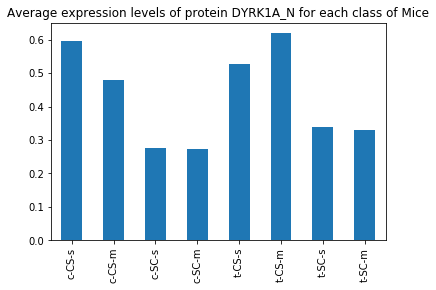

In [28]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein DYRK1A_N for each class of Mice')
plt.show()

In [29]:
exp2 = mice[['ITSN1_N', 'class']]
exp2 = exp2[exp2.ITSN1_N != 0]

exp2class1 = exp2[exp2['class'] == 'c-CS-s']
class1avg = exp2class1.mean()

exp2class2 = exp2[exp2['class'] == 'c-CS-m']
class2avg = exp2class2.mean()

exp2class3 = exp2[exp2['class'] == 'c-SC-s']
class3avg = exp2class3.mean()

exp2class4 = exp2[exp2['class'] == 'c-SC-m']
class4avg = exp2class4.mean()

exp2class5 = exp2[exp2['class'] == 't-CS-s']
class5avg = exp2class5.mean()

exp2class6 = exp2[exp2['class'] == 't-CS-m']
class6avg = exp2class6.mean()

exp2class7 = exp2[exp2['class'] == 't-SC-s']
class7avg = exp2class7.mean()

exp2class8 = exp2[exp2['class'] == 't-SC-m']
class8avg = exp2class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
ITSN1_N,0.772395,0.652587,0.449354,0.436361,0.759556,0.797007,0.549056,0.566783


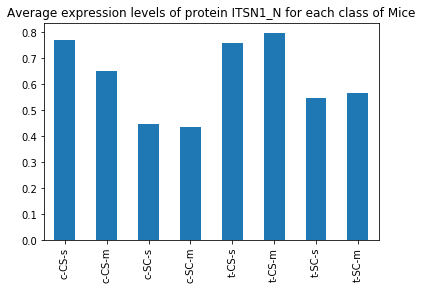

In [30]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein ITSN1_N for each class of Mice')
plt.show()

In [31]:
exp3 = mice[['BDNF_N', 'class']]
exp3 = exp3[exp3.BDNF_N != 0]

exp3class1 = exp3[exp3['class'] == 'c-CS-s']
class1avg = exp3class1.mean()

exp3class2 = exp3[exp3['class'] == 'c-CS-m']
class2avg = exp3class2.mean()

exp3class3 = exp3[exp3['class'] == 'c-SC-s']
class3avg = exp3class3.mean()

exp3class4 = exp3[exp3['class'] == 'c-SC-m']
class4avg = exp3class4.mean()

exp3class5 = exp3[exp3['class'] == 't-CS-s']
class5avg = exp3class5.mean()

exp3class6 = exp3[exp3['class'] == 't-CS-m']
class6avg = exp3class6.mean()

exp3class7 = exp3[exp3['class'] == 't-SC-s']
class7avg = exp3class7.mean()

exp3class8 = exp3[exp3['class'] == 't-SC-m']
class8avg = exp3class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs


,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
BDNF_N,0.342315,0.339217,0.313393,0.290946,0.30546,0.312732,0.325586,0.321063


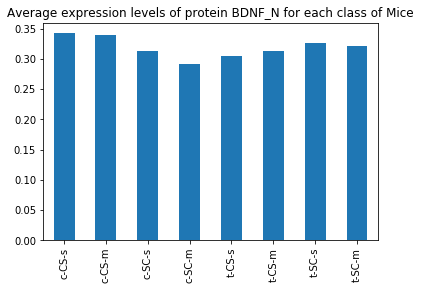

In [32]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein BDNF_N for each class of Mice')
plt.show()

In [33]:
exp4 = mice[['NR1_N', 'class']]
exp4 = exp4[exp4.NR1_N != 0]

exp4class1 = exp4[exp4['class'] == 'c-CS-s']
class1avg = exp4class1.mean()

exp4class2 = exp4[exp4['class'] == 'c-CS-m']
class2avg = exp4class2.mean()

exp4class3 = exp4[exp4['class'] == 'c-SC-s']
class3avg = exp4class3.mean()

exp4class4 = exp4[exp4['class'] == 'c-SC-m']
class4avg = exp4class4.mean()

exp4class5 = exp4[exp4['class'] == 't-CS-s']
class5avg = exp4class5.mean()

exp4class6 = exp4[exp4['class'] == 't-CS-m']
class6avg = exp4class6.mean()

exp4class7 = exp4[exp4['class'] == 't-SC-s']
class7avg = exp4class7.mean()

exp4class8 = exp4[exp4['class'] == 't-SC-m']
class8avg = exp4class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs


,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
NR1_N,2.417809,2.381749,2.404974,2.145633,2.184606,2.196541,2.248742,2.379446


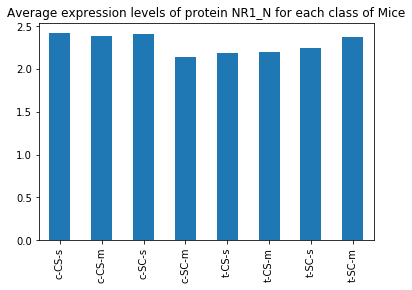

In [34]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein NR1_N for each class of Mice')
plt.show()

In [35]:
exp5 = mice[['NR2A_N', 'class']]
exp5 = exp5[exp5.NR2A_N != 0]

exp5class1 = exp5[exp5['class'] == 'c-CS-s']
class1avg = exp5class1.mean()

exp5class2 = exp5[exp5['class'] == 'c-CS-m']
class2avg = exp5class2.mean()

exp5class3 = exp5[exp5['class'] == 'c-SC-s']
class3avg = exp5class3.mean()

exp5class4 = exp5[exp5['class'] == 'c-SC-m']
class4avg = exp5class4.mean()

exp5class5 = exp5[exp5['class'] == 't-CS-s']
class5avg = exp5class5.mean()

exp5class6 = exp5[exp5['class'] == 't-CS-m']
class6avg = exp5class6.mean()

exp5class7 = exp5[exp5['class'] == 't-SC-s']
class7avg = exp5class7.mean()

exp5class8 = exp5[exp5['class'] == 't-SC-m']
class8avg = exp5class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
NR2A_N,4.280077,4.30854,3.913096,3.459416,3.514839,3.56596,3.565093,4.056223


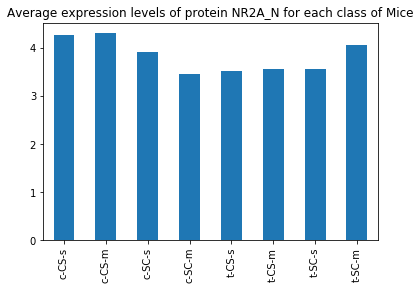

In [36]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein NR2A_N for each class of Mice')
plt.show()

In [37]:
exp6 = mice[['pAKT_N', 'class']]
exp6 = exp6[exp6.pAKT_N != 0]

exp6class1 = exp6[exp6['class'] == 'c-CS-s']
class1avg = exp6class1.mean()

exp6class2 = exp6[exp6['class'] == 'c-CS-m']
class2avg = exp6class2.mean()

exp6class3 = exp6[exp6['class'] == 'c-SC-s']
class3avg = exp6class3.mean()

exp6class4 = exp6[exp6['class'] == 'c-SC-m']
class4avg = exp6class4.mean()

exp6class5 = exp6[exp6['class'] == 't-CS-s']
class5avg = exp6class5.mean()

exp6class6 = exp6[exp6['class'] == 't-CS-m']
class6avg = exp6class6.mean()

exp6class7 = exp6[exp6['class'] == 't-SC-s']
class7avg = exp6class7.mean()

exp6class8 = exp6[exp6['class'] == 't-SC-m']
class8avg = exp6class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
pAKT_N,0.212423,0.229932,0.233368,0.241253,0.214466,0.213621,0.246759,0.269131


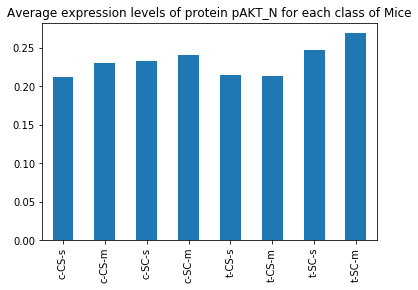

In [38]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein pAKT_N for each class of Mice')
plt.show()

In [39]:
exp7 = mice[['pBRAF_N', 'class']]
exp7 = exp7[exp7.pBRAF_N != 0]

exp7class1 = exp7[exp7['class'] == 'c-CS-s']
class1avg = exp7class1.mean()

exp7class2 = exp7[exp7['class'] == 'c-CS-m']
class2avg = exp7class2.mean()

exp7class3 = exp7[exp7['class'] == 'c-SC-s']
class3avg = exp7class3.mean()

exp7class4 = exp7[exp7['class'] == 'c-SC-m']
class4avg = exp7class4.mean()

exp7class5 = exp7[exp7['class'] == 't-CS-s']
class5avg = exp7class5.mean()

exp7class6 = exp7[exp7['class'] == 't-CS-m']
class6avg = exp7class6.mean()

exp7class7 = exp7[exp7['class'] == 't-SC-s']
class7avg = exp7class7.mean()

exp7class8 = exp7[exp7['class'] == 't-SC-m']
class8avg = exp7class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
pBRAF_N,0.168356,0.182211,0.184975,0.189547,0.164795,0.173956,0.185318,0.201007


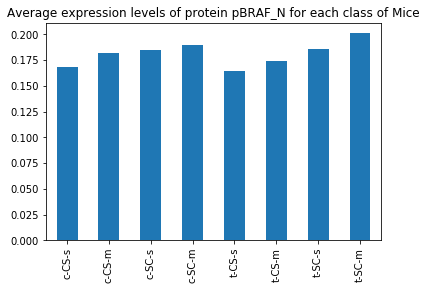

In [40]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein pBRAF_N for each class of Mice')
plt.show()

In [41]:
exp8 = mice[['pCAMKII_N', 'class']]
exp8 = exp8[exp8.pCAMKII_N != 0]

exp8class1 = exp8[exp8['class'] == 'c-CS-s']
class1avg = exp8class1.mean()

exp8class2 = exp8[exp8['class'] == 'c-CS-m']
class2avg = exp8class2.mean()

exp8class3 = exp8[exp8['class'] == 'c-SC-s']
class3avg = exp8class3.mean()

exp8class4 = exp8[exp8['class'] == 'c-SC-m']
class4avg = exp8class4.mean()

exp8class5 = exp8[exp8['class'] == 't-CS-s']
class5avg = exp8class5.mean()

exp8class6 = exp8[exp8['class'] == 't-CS-m']
class6avg = exp8class6.mean()

exp8class7 = exp8[exp8['class'] == 't-SC-s']
class7avg = exp8class7.mean()

exp8class8 = exp8[exp8['class'] == 't-SC-m']
class8avg = exp8class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
pCAMKII_N,2.935576,2.916187,3.361288,4.736327,2.488902,3.121801,4.176555,4.277257


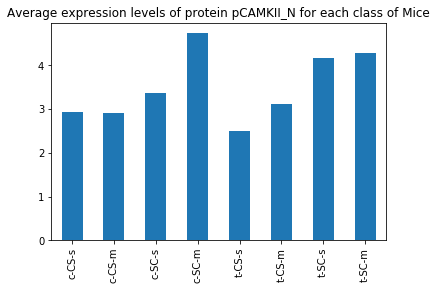

In [42]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein pCAMKII_N for each class of Mice')
plt.show()

In [43]:
exp9 = mice[['pCREB_N', 'class']]
exp9 = exp9[exp9.pCREB_N != 0]

exp9class1 = exp9[exp9['class'] == 'c-CS-s']
class1avg = exp9class1.mean()

exp9class2 = exp9[exp9['class'] == 'c-CS-m']
class2avg = exp9class2.mean()

exp9class3 = exp9[exp9['class'] == 'c-SC-s']
class3avg = exp9class3.mean()

exp9class4 = exp9[exp9['class'] == 'c-SC-m']
class4avg = exp9class4.mean()

exp9class5 = exp9[exp9['class'] == 't-CS-s']
class5avg = exp9class5.mean()

exp9class6 = exp9[exp9['class'] == 't-CS-m']
class6avg = exp9class6.mean()

exp9class7 = exp9[exp9['class'] == 't-SC-s']
class7avg = exp9class7.mean()

exp9class8 = exp9[exp9['class'] == 't-SC-m']
class8avg = exp9class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
pCREB_N,0.208439,0.198484,0.214949,0.208149,0.210041,0.203395,0.227165,0.231789


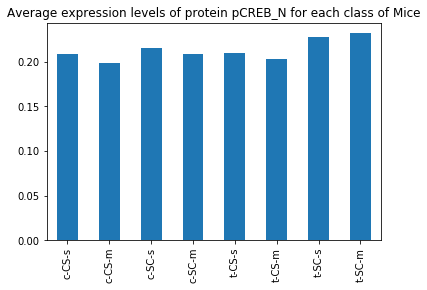

In [44]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein pCREB_N for each class of Mice')
plt.show()

In [45]:
exp10 = mice[['pELK_N', 'class']]
exp10 = exp10[exp10.pELK_N != 0]

exp10class1 = exp10[exp10['class'] == 'c-CS-s']
class1avg = exp10class1.mean()

exp10class2 = exp10[exp10['class'] == 'c-CS-m']
class2avg = exp10class2.mean()

exp10class3 = exp10[exp10['class'] == 'c-SC-s']
class3avg = exp10class3.mean()

exp10class4 = exp10[exp10['class'] == 'c-SC-m']
class4avg = exp10class4.mean()

exp10class5 = exp10[exp10['class'] == 't-CS-s']
class5avg = exp10class5.mean()

exp10class6 = exp10[exp10['class'] == 't-CS-m']
class6avg = exp10class6.mean()

exp10class7 = exp10[exp10['class'] == 't-SC-s']
class7avg = exp10class7.mean()

exp10class8 = exp10[exp10['class'] == 't-SC-m']
class8avg = exp10class8.mean()

classAvgData = {'c-CS-s' : class1avg, 'c-CS-m' : class2avg, 'c-SC-s' : class3avg, 'c-SC-m' : class4avg
               ,'t-CS-s' : class5avg, 't-CS-m' : class6avg, 't-SC-s' : class7avg, 't-SC-m' : class8avg}
classAvgs = pd.DataFrame(data = classAvgData)
classAvgs

,c-CS-s,c-CS-m,c-SC-s,c-SC-m,t-CS-s,t-CS-m,t-SC-s,t-SC-m
pELK_N,1.686844,1.492318,1.327714,1.278566,1.518302,1.563905,1.20484,1.381516


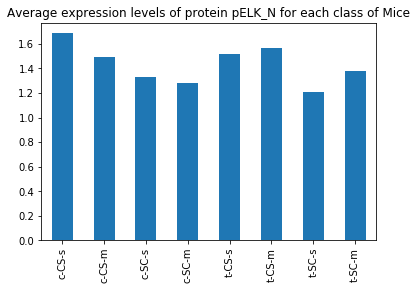

In [46]:
row = classAvgs.iloc[0]
row.plot(kind='bar', title = 'Average expression levels of protein pELK_N for each class of Mice')
plt.show()

In [47]:
print('---Task 3: Data Modelling---')

---Task 3: Data Modelling---


In [48]:
miceTarget = mice['class']
miceData = mice
del miceData['MouseID']
del miceData['Genotype']
del miceData['Treatment']
del miceData['Behavior']
del miceData['class']

In [49]:
miceTarget

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [50]:
miceTarget.shape

(1080,)

In [51]:
miceData

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.0,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.0,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.0,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.0,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [52]:
miceData.shape

(1080, 77)

In [53]:
x_train, x_test, y_train, y_test =train_test_split(miceData,miceTarget,test_size=0.5,random_state=4)

In [54]:
x_train

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
977,0.490756,0.836221,0.376440,2.620559,4.414287,0.250121,0.198529,4.218662,0.259413,1.345659,...,0.217450,0.146624,0.104029,0.122865,0.109052,0.486940,0.154008,0.150241,0.161292,1.453787
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.000000,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
263,0.342356,0.532230,0.276144,1.967478,3.083350,0.219279,0.172152,3.806037,0.173515,1.197079,...,0.270591,0.154232,0.133356,0.119781,0.124344,0.383299,0.129934,0.190167,0.181040,0.974219
432,0.350444,0.456195,0.356233,1.959475,2.934774,0.290621,0.192590,3.191432,0.255886,1.640679,...,0.232127,0.000000,0.000000,0.108884,0.146874,0.489381,0.000000,0.000000,0.000000,1.421179
767,0.308938,0.586756,0.397755,2.673014,6.215859,0.299986,0.235612,4.273980,0.268012,1.655677,...,0.199690,0.000000,0.118617,0.139975,0.097702,0.434410,0.156160,0.170054,0.000000,0.887000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0.266933,0.513347,0.338841,2.846741,4.992192,0.261849,0.209007,3.725622,0.240058,1.286726,...,0.207633,0.151628,0.124456,0.134619,0.104750,0.526447,0.116470,0.155569,0.193425,1.377722
360,2.480316,2.488684,0.437048,3.126094,6.003804,0.209776,0.185337,3.153290,0.236021,4.497337,...,0.203517,0.117520,0.109612,0.114036,0.110552,0.540593,0.000000,0.136711,0.000000,2.009125
709,0.305026,0.589832,0.302282,2.454650,3.894858,0.252166,0.193241,4.202051,0.239168,1.230647,...,0.202644,0.124567,0.114897,0.138142,0.101943,0.544406,0.431195,0.155798,0.287197,1.268832
439,0.302761,0.473041,0.322587,2.527886,4.099685,0.242727,0.180656,4.016491,0.197517,1.299055,...,0.251730,0.150038,0.131296,0.132161,0.142253,0.393406,0.144848,0.197616,0.173395,0.983756


In [55]:
x_train.shape

(540, 77)

In [56]:
y_train

977    t-SC-s
3      c-CS-m
263    c-SC-m
432    c-CS-s
767    t-SC-m
        ...  
456    c-SC-s
360    c-CS-s
709    t-SC-m
439    c-SC-s
174    c-SC-m
Name: class, Length: 540, dtype: object

In [57]:
y_train.shape

(540,)

In [58]:
x_test

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
858,0.425800,0.704007,0.300497,2.129923,3.277630,0.228664,0.170228,4.190900,0.237903,1.234669,...,0.237162,0.167413,0.118092,0.118791,0.111655,0.502519,0.193788,0.162866,0.188051,1.791101
735,0.330477,0.567582,0.355307,2.735094,4.751005,0.253366,0.206854,3.375590,0.231509,1.768666,...,0.216792,0.000000,0.000000,0.122210,0.139372,0.401108,0.000000,0.000000,0.319763,0.673696
964,0.364357,0.603839,0.269501,2.031693,3.103895,0.194398,0.174199,2.980136,0.204553,0.956143,...,0.242126,0.159684,0.115291,0.120208,0.139590,0.395967,0.171797,0.174719,0.176571,1.245190
628,0.538779,0.627249,0.235624,1.572692,2.252728,0.189030,0.159245,1.570628,0.162194,1.377765,...,0.258695,0.193259,0.142703,0.096988,0.161886,0.280925,0.158300,0.241484,0.203837,1.102546
303,0.544844,0.726999,0.390846,2.521089,4.967323,0.275550,0.190962,4.576825,0.240209,1.591425,...,0.210709,0.000000,0.109496,0.117714,0.099507,0.385510,0.177962,0.141927,0.000000,1.394424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.316724,0.503506,0.251380,2.017604,2.937043,0.182903,0.147546,2.131434,0.161271,1.073251,...,0.213697,0.146840,0.119874,0.107459,0.140429,0.429836,0.126895,0.183169,0.167396,1.735219
177,0.269688,0.408125,0.317188,2.138750,3.045000,0.314375,0.225000,5.321562,0.225938,1.347500,...,0.247589,0.229199,0.213949,0.121776,0.205876,0.484189,0.242880,0.340884,0.355461,1.049338
973,0.235137,0.390109,0.206749,1.466881,1.836636,0.165685,0.146402,1.657383,0.154258,0.755044,...,0.238396,0.192413,0.122719,0.114815,0.150022,0.371605,0.189395,0.211381,0.254778,0.999856
1056,0.237047,0.413551,0.296071,2.140444,2.790283,0.241412,0.183336,3.255456,0.227747,1.026571,...,0.227923,0.156019,0.000000,0.117662,0.000000,0.322274,0.287124,0.162432,0.249507,1.383078


In [59]:
x_test.shape

(540, 77)

In [60]:
y_test

858     t-CS-s
735     t-SC-m
964     t-SC-s
628     t-CS-m
303     c-CS-s
         ...  
416     c-CS-s
177     c-SC-m
973     t-SC-s
1056    t-SC-s
458     c-SC-s
Name: class, Length: 540, dtype: object

In [61]:
y_test.shape

(540,)

In [62]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print(cm)

[[68  1  0  0  0  0  0  0]
 [ 6 65  0  0  0  1  0  0]
 [ 0  0 78  0  0  0  3  0]
 [ 0  0  0 56  0  0  0  0]
 [ 0  0  0  0 68  3  0  0]
 [ 3  1  0  0  0 53  0  0]
 [ 0  0  3  2  0  0 64  0]
 [ 0  0  1  0  0  0  0 64]]


In [63]:
print("[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

[Train/test split] score: 0.95556


In [64]:
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

In [65]:
for train_index, test_index in kf.split(miceData):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = miceData.iloc[train_index], miceData.iloc[test_index]
    y_train, y_test = miceTarget.iloc[train_index], miceTarget.iloc[test_index]

TRAIN: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   18   19   20   21   22   23   24   25   26   27   28
   29   31   32   34   36   37   38   39   41   42   43   44   45   46
   48   49   50   51   52   53   54   56   57   60   61   62   64   65
   67   68   69   71   73   77   78   79   80   81   82   83   84   85
   86   87   90   91   93   94   95   96   97   99  100  101  103  105
  106  107  108  109  111  113  114  116  117  118  119  120  121  122
  123  125  126  127  128  129  130  131  132  134  135  136  137  139
  140  141  142  143  144  145  146  148  149  150  151  155  156  158
  159  160  165  166  167  168  169  170  171  172  173  174  175  176
  177  180  181  182  183  184  185  186  187  189  190  192  193  194
  195  196  197  198  199  200  201  203  204  205  206  207  208  209
  210  212  213  214  216  217  218  219  220  222  223  226  227  228
  229  230  231  232  233  234  235  239  240  241  242  243  245  246

In [66]:
for k, (train_index, test_index) in enumerate(kf.split(miceData)):
    x_train, x_test = miceData.iloc[train_index], miceData.iloc[test_index]
    y_train, y_test = miceTarget.iloc[train_index], miceTarget.iloc[test_index]
    knn.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

[fold 0] score: 0.97222
[fold 1] score: 1.00000
[fold 2] score: 0.98148
[fold 3] score: 1.00000
[fold 4] score: 0.99537


In [67]:
print("KNN mean score [5 folds] = 0.989814")

KNN mean score [5 folds] = 0.989814


In [68]:
dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
fit = dtc.fit(x_train, y_train)
y_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[29  1  0  0  2  1  0  0]
 [ 2 12  0  0  3  3  0  1]
 [ 0  0 27  2  0  0  0  0]
 [ 0  0  0 34  0  0  3  0]
 [ 1  0  0  0 23  0  0  1]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  1  3  0  0 25  0]
 [ 0  0  0  0  0  0  0 24]]


In [69]:
print("[Train/test split] score: {:.5f}".format(dtc.score(x_test, y_test)))

[Train/test split] score: 0.88889


In [70]:
for k, (train_index, test_index) in enumerate(kf.split(miceData)):
    x_train, x_test = miceData.iloc[train_index], miceData.iloc[test_index]
    y_train, y_test = miceTarget.iloc[train_index], miceTarget.iloc[test_index]
    dtc.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, dtc.score(x_test, y_test)))

[fold 0] score: 0.87037
[fold 1] score: 0.92130
[fold 2] score: 0.85648
[fold 3] score: 0.88426
[fold 4] score: 0.88889


In [71]:
print("DT mean score [5 folds] = 0.873148")

DT mean score [5 folds] = 0.873148
